# CTA "L" Data

The data we have from the CTA comes from a couple of different sources. The main data that we wish to analyze comes from the CTA Train Tracker Map (https://www.transitchicago.com/traintrackermap/). This is tied to the CTA Train Tracker API (https://www.transitchicago.com/developers/traintracker/), but because it is general, does not face the same limits and key constraints. However, the [documentation](https://www.transitchicago.com/developers/ttdocs/) can be useful in deciphering the data.

The General Transit Feed Specification (GTFS) is an open format for transit schedule data. Chicago's [GTFS Data](https://www.transitchicago.com/developers/gtfs/) provides information about its routes, including both bus and "L" routes. We can download this data from the [feed](https://www.transitchicago.com/downloads/sch_data/), and use the various files to extract "L" specific information. The `l_stops` data below is this extracted infromation. Note that a station (`parent_station`) can have multiple stops.

To run the code, you will need the data but also a python installation with support for pandas and pyarrow. Suggest using [Microsoft VS Code](https://code.visualstudio.com) and/or [Anaconda](https://www.anaconda.com/products/distribution). To generate the maps, you will need [shapely](https://shapely.readthedocs.io/en/stable/) which can be installed via anaconda.

There are many python references, but for pandas, the following reference is open-access: <https://wesmckinney.com/book/>

### GTFS Data

In [1]:
import pandas as pd
from IPython.display import display

def pdisp(df, min_rows=10, max_rows=20):
    with pd.option_context('display.min_rows', min_rows, 'display.max_rows', max_rows):
        display(df)

In [2]:
import pandas as pd
l_stops = pd.read_parquet('l-stops.parquet').astype({'parent_station': 'int'})

In [3]:
pdisp(l_stops, 10, 20)

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding
10779,30001,NaN,Austin-Blue,None,41.870851,-87.776812,0,40010,0
10780,30002,NaN,Austin-Blue,None,41.870851,-87.776812,0,40010,0
10781,30003,NaN,Harlem-Green,None,41.886848,-87.803176,0,40020,1
10782,30004,NaN,Harlem-Green,None,41.886848,-87.803176,0,40020,1
10783,30005,NaN,Pulaski-Green,None,41.885412,-87.725404,0,40030,1
...,...,...,...,...,...,...,...,...,...
11068,30382,NaN,Cermak-McCormick Place,None,41.853115,-87.626402,0,41690,1
11069,30383,NaN,Washington/Wabash,None,41.883220,-87.626189,0,41700,1
11070,30384,NaN,Washington/Wabash,None,41.883220,-87.626189,0,41700,1
11071,30385,NaN,Wilson-South Outer,None,41.964273,-87.657588,0,40540,1


In [4]:
l_stops.sort_values('parent_station')

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding
10779,30001,NaN,Austin-Blue,None,41.870851,-87.776812,0,40010,0
10780,30002,NaN,Austin-Blue,None,41.870851,-87.776812,0,40010,0
10781,30003,NaN,Harlem-Green,None,41.886848,-87.803176,0,40020,1
10782,30004,NaN,Harlem-Green,None,41.886848,-87.803176,0,40020,1
10783,30005,NaN,Pulaski-Green,None,41.885412,-87.725404,0,40030,1
...,...,...,...,...,...,...,...,...,...
11063,30297,NaN,Oakton-Skokie,None,42.026243,-87.747221,0,41680,1
11067,30381,NaN,Cermak-McCormick Place,None,41.853115,-87.626402,0,41690,1
11068,30382,NaN,Cermak-McCormick Place,None,41.853115,-87.626402,0,41690,1
11069,30383,NaN,Washington/Wabash,None,41.883220,-87.626189,0,41700,1


The CTA "L" stations seem to be numbered consecutively according to when they were catalogued or added. They are a five-digit number that starts with four (4) and ends with zero (0). Evidence that these correspond to a chronological order includes the last three stops:

* Oakton-Skokie: 41680 (completed Apr. 2012, https://en.wikipedia.org/wiki/Oakton–Skokie_station)
* Cermak-McCormick Place: 41690 (completed Feb. 2015, https://en.wikipedia.org/wiki/Cermak–McCormick_Place_station)
* Washington/Wabash: 41700 (completed Aug. 2017, https://en.wikipedia.org/wiki/Washington/Wabash_station)

The stop ids start with a three (3) and serve to split a "station" into separate tracks/directions. These, too, are numbered based on chronological order, and new stops can be added to an existing (older) station. Evidence:

* 30383 (N) Washington/Wabash (41700), new station (completed Aug. 2017, https://en.wikipedia.org/wiki/Washington/Wabash_station)
* 30384 (S) Washington/Wabash (41700)
* 30385 (S) Wilson-South Outer (40540), new tracks (completed Feb. 2018, https://en.wikipedia.org/wiki/Wilson_station_(CTA))
* 30386 (N) Wilson-North Outer (40540)

### Train Tracker Data

In [5]:
import pandas as pd

edf = pd.read_parquet('2022-03-entries-start.parquet')

In [6]:
pdisp(edf.Flags.value_counts().to_frame(),20,40)

,Flags
,1509428
D,12155
A,11680
E,4499
C,3501
T,1354
R,1061
RA,508
N,441
AE,312


In the collected data, we find a third identifier (`CurrentStationId`) which seems to correspond to a fixed location along the track. Perhaps there are sensors at these locations which allow trains to check in at the locations. In any case, we seem to have an imperfect correspondence between the line and the first digit. Note that because lines overlap and trains will run on the same tracks, this reinforces the idea that these are sensors. The second digit is a 1 or 5 which indicates direction (see [Appendix C](https://www.transitchicago.com/developers/ttdocs/#_Toc296199910) of the API Documentation), and the last three digits tend to mostly be ordered.

In [7]:
(edf.groupby([
    'LineName',
    edf.CurrentStationId // 10000 # get the first digit
    ]).size() # count number in each group
    .loc[lambda s: s > 0] # get only non-zero
)

LineName  CurrentStationId
Blu       1                   312745
          6                       82
          8                       11
Brn       3                   213195
          4                        4
          5                      466
          8                        7
Grn       3                    11504
          4                   205408
          5                    32932
          6                        6
Org       3                       43
          4                      157
          5                   120658
          6                        1
Pnk       1                      245
          3                       78
          4                    24373
          5                    22365
          6                    80857
Pur       3                    23646
          4                       14
          5                     8241
          6                      131
          7                    67127
          8                    17004
Red       3

In [8]:
# shows the second digit is always 1 or 5
((edf.CurrentStationId % 10000) // 1000).unique()

array([1, 5])

The other fields in the entries data include:

* Line: a code for the line (e.g. B for Blue Line)
* Datetime: a timestamp indicating the time the data was collected (UTC)
* Lat/Lng: latitude and longitude that can be used to plot the position on a map
* RunNumber: a number assigned to a train when it is running. Trains can keep the same run number for multiple trips up and down a line.
* ExitStationId: ??? Numbers seem to match the CurrentStationId format
* Direction: the direction the train is traveling (in radians)
* LineName: an expansion of the Line code
* DirMod: seems to be a language element that specifies how the train is moving
* DestName: the end of the trip (usually the end of the line), important when a route splits 
* IsSched: a boolean, generally always False for our data
* CSSClass: used for browser rending
* Flags: ???

In [9]:
edf.groupby(['CurrentStationId','Lat','Lng','Direction']).size().reset_index().CurrentStationId.value_counts().sort_values()

45260    1
11041    1
11045    1
11050    1
11052    1
        ..
81659    3
81650    3
81642    3
81667    4
35430    4
Name: CurrentStationId, Length: 1925, dtype: int64

The above code shows that the CurrentStationId tends to predict the Lat, Lng, and Direction exactly. If the data was actually generated via GPS (e.g. like the "you are here" marker on your phone), we would expect much more variation. Thus, it is likely that this information is generated from the CurrentStationId.

### A Single Train (Run)

For a given run number, we can track the train's path over time and even display it on a map.

In [10]:
edf.query('RunNumber == 720').iloc[:10] # first 100 entries

,Line,Datetime,Lat,Lng,RunNumber,CurrentStationId,ExitStationId,Direction,LineName,DirMod,DestName,IsSched,CSSClass,Flags
72,O,2022-03-01 00:00:01,41.82949,-87.68070,720,55440,55520,3.672814,Org,to,Midway,False,ttpm_predslip_orange,
146,O,2022-03-01 00:00:21,41.82949,-87.68070,720,55440,55520,3.672814,Org,to,Midway,False,ttpm_predslip_orange,
219,O,2022-03-01 00:00:41,41.82949,-87.68070,720,55440,55520,3.672814,Org,to,Midway,False,ttpm_predslip_orange,
295,O,2022-03-01 00:01:02,41.82841,-87.68250,720,55441,55520,3.697211,Org,to,Midway,False,ttpm_predslip_orange,
369,O,2022-03-01 00:01:22,41.82731,-87.68428,720,55443,55520,3.697211,Org,to,Midway,False,ttpm_predslip_orange,
444,O,2022-03-01 00:01:42,41.82524,-87.68620,720,55445,55520,4.946102,Org,to,Midway,False,ttpm_predslip_orange,
519,O,2022-03-01 00:02:01,41.82228,-87.68429,720,55446,55520,5.330716,Org,to,Midway,False,ttpm_predslip_orange,
594,O,2022-03-01 00:02:22,41.81867,-87.68176,720,55447,55520,5.317477,Org,to,Midway,False,ttpm_predslip_orange,
669,O,2022-03-01 00:02:42,41.81395,-87.67972,720,55451,55520,4.735970,Org,to,Midway,False,ttpm_predslip_orange,
746,O,2022-03-01 00:03:01,41.80903,-87.67959,720,55453,55520,4.735522,Org,to,Midway,False,ttpm_predslip_orange,


In [11]:
edf.query('RunNumber == 720').iloc[:10][['Datetime']]

,Datetime
72,2022-03-01 00:00:01
146,2022-03-01 00:00:21
219,2022-03-01 00:00:41
295,2022-03-01 00:01:02
369,2022-03-01 00:01:22
444,2022-03-01 00:01:42
519,2022-03-01 00:02:01
594,2022-03-01 00:02:22
669,2022-03-01 00:02:42
746,2022-03-01 00:03:01


In [12]:
import shapely.geometry
import urllib.parse
import json
from IPython.core.display import HTML

run720 = edf.query('RunNumber == 720').iloc[:100] # just the first 100 points

# some processing with shapely
ls = shapely.geometry.LineString(run720[['Lng','Lat']].values)
ls_as_str = json.dumps(shapely.geometry.mapping(ls))

# create a URL that will draw the route
base_url = "http://geojson.io/#data=data:application/json,"
url = base_url + urllib.parse.quote(ls_as_str)
HTML(f'<a href="{url}">Map (Click To See Route)</a>')

### pydeck Visualization

This is another way to visualize this data using the [pydeck](https://deckgl.readthedocs.io/en/latest/) library which uses the [deck.gl](https://deck.gl) library originally developed for use at Uber. It constructs layers, and in this case, we can feed it a path composed of longitude, latitude numbers. You may need to install both the ipywidgets and pydeck libraries to get this to work.

In [13]:
import pydeck

run_number = 720
start_time = "2022-03-01 00:00:00"
end_time = "2022-03-01 02:00:00"
run = edf.query('RunNumber == @run_number and @start_time < Datetime < @end_time')
path = run.sort_values('Datetime')[['Lng','Lat']].pipe(lambda df: df[(df.Lng.shift(-1) != df.Lng) | (df.Lat.shift(-1) != df.Lat)]) # .values.tolist()

trajs = [{'RunNumber': run_number, 
          'path': path.values.tolist(),
          'color': [255, 0, 0, 255]}]

layer = pydeck.Layer(
    'PathLayer',
    trajs,
    get_path='path',
    get_color='color',
    width=5000,
    width_min_pixels=2,
    pickable=True,
)

iv = pydeck.ViewState(
  latitude=41.84494,
  longitude=-87.63127,
  zoom=10,
  max_zoom=16,
)

r = pydeck.Deck(layers=[layer],
                initial_view_state=iv,
                tooltip=True)

r

{
  "initialViewState": {
    "latitude": 41.84494,
    "longitude": -87.63127,
    "maxZoom": 16,
    "zoom": 10
  },
  "layers": [
    {
      "@@type": "PathLayer",
      "data": [
        {
          "RunNumber": 720,
          "color": [
            255,
            0,
            0,
            255
          ],
          "path": [
            [
              -87.6807,
              41.82949
            ],
            [
              -87.6825,
              41.82841
            ],
            [
              -87.68428,
              41.82731
            ],
            [
              -87.6862,
              41.82524
            ],
            [
              -87.68429,
              41.82228
            ],
            [
              -87.68176,
              41.81867
            ],
            [
              -87.67972,
              41.81395
            ],
            [
              -87.67959,
              41.80903
            ],
            [
              -87.67955,
              41.80757
            ],
            [
              -87.68244,
              41.80469
            ],
            [
              -87.68402,
              41.80468
            ],
            [
              -87.68911,
              41.80461
            ],
            [
              -87.69599,
              41.8045
            ],
            [
              -87.69901,
              41.80444
            ],
            [
              -87.70384,
              41.80436
            ],
            [
              -87.70441,
              41.80435
            ],
            [
              -87.70805,
              41.80431
            ],
            [
              -87.71169,
              41.80425
            ],
            [
              -87.71546,
              41.80366
            ],
            [
              -87.72105,
              41.80138
            ],
            [
              -87.7249,
              41.79971
            ],
            [
              -87.72723,
              41.7988
            ],
            [
              -87.73224,
              41.79682
            ],
            [
              -87.735,
              41.79572
            ],
            [
              -87.73813,
              41.79287
            ],
            [
              -87.73796,
              41.78661
            ],
            [
              -87.73636,
              41.79497
            ],
            [
              -87.72493,
              41.7997
            ],
            [
              -87.72453,
              41.79986
            ],
            [
              -87.72058,
              41.80158
            ],
            [
              -87.71671,
              41.80319
            ],
            [
              -87.71499,
              41.80381
            ],
            [
              -87.7067,
              41.80433
            ],
            [
              -87.70441,
              41.80435
            ],
            [
              -87.70278,
              41.80438
            ],
            [
              -87.69736,
              41.80447
            ],
            [
              -87.68969,
              41.80461
            ],
            [
              -87.68694,
              41.80463
            ],
            [
              -87.68562,
              41.80466
            ],
            [
              -87.68402,
              41.80468
            ],
            [
              -87.68161,
              41.80481
            ],
            [
              -87.67969,
              41.80617
            ],
            [
              -87.67961,
              41.81007
            ],
            [
              -87.68011,
              41.81594
            ],
            [
              -87.6828,
              41.82017
            ],
            [
              -87.68397,
              41.82182
            ],
            [
              -87.68536,
              41.82379
            ],
            [
              -87.68557,
              

### Predictions

For each train, the CTA calculates the number of minutes until it is expected at the next stops on the line. When that number of minutes is less than two, it instead lists the expected time as "Due". The `ParentStop` attribute matches the 4xxxx `parent_station` numbers that are listed above in the GTFS data. Thus, we have a link between the routes that are listed and stops that are predicted. When a prediction has not changed since it's last set of predictions, the data is not recorded.

In general, we would expect that the stops would be listed in order from the next stop to the one after and so on. However, when the stops are close together and thus expected within a minute of each other, the predictions may be the same. In these cases, the stop may be out of order, meaning that the stops as ordered by `StopOrder` are not as they would be encountered by the train.

In [14]:
import pandas as pd

pdf = pd.read_parquet('2022-03-preds-start.parquet')

In [15]:
# set of predictions for a run at a specific time
pdf.query('RunNumber == 819 & Datetime == "2022-03-01 00:00:01"')

,Line,Datetime,CurrentStationId,RunNumber,StopOrder,ParentStop,StopName,Prediction
0,R,2022-03-01 00:00:01,81300,819,0,41660,Lake,Due
1,R,2022-03-01 00:00:01,81300,819,1,40330,Grand,2
2,R,2022-03-01 00:00:01,81300,819,2,41450,Chicago,4
3,R,2022-03-01 00:00:01,81300,819,3,40630,Clark/Division,8
4,R,2022-03-01 00:00:01,81300,819,4,40650,North/Clybourn,10
5,R,2022-03-01 00:00:01,81300,819,5,41220,Fullerton,13
6,R,2022-03-01 00:00:01,81300,819,6,41320,Belmont,15
7,R,2022-03-01 00:00:01,81300,819,7,41420,Addison,18


In [16]:
# predictions twenty seconds later
pdf.query('RunNumber == 819 & Datetime == "2022-03-01 00:00:21"')

,Line,Datetime,CurrentStationId,RunNumber,StopOrder,ParentStop,StopName,Prediction
538,R,2022-03-01 00:00:21,81320,819,0,41660,Lake,Due
539,R,2022-03-01 00:00:21,81320,819,1,40330,Grand,2
540,R,2022-03-01 00:00:21,81320,819,2,41450,Chicago,3
541,R,2022-03-01 00:00:21,81320,819,3,40630,Clark/Division,7
542,R,2022-03-01 00:00:21,81320,819,4,40650,North/Clybourn,9
543,R,2022-03-01 00:00:21,81320,819,5,41220,Fullerton,12
544,R,2022-03-01 00:00:21,81320,819,6,41320,Belmont,14
545,R,2022-03-01 00:00:21,81320,819,7,41420,Addison,17


In [17]:
# and 20 more seconds later
pdf.query('RunNumber == 819 & Datetime == "2022-03-01 00:00:41"')

,Line,Datetime,CurrentStationId,RunNumber,StopOrder,ParentStop,StopName,Prediction
884,R,2022-03-01 00:00:41,81340,819,0,40330,Grand,2
885,R,2022-03-01 00:00:41,81340,819,1,41450,Chicago,3
886,R,2022-03-01 00:00:41,81340,819,2,40630,Clark/Division,7
887,R,2022-03-01 00:00:41,81340,819,3,40650,North/Clybourn,9
888,R,2022-03-01 00:00:41,81340,819,4,41220,Fullerton,11
889,R,2022-03-01 00:00:41,81340,819,5,41320,Belmont,14
890,R,2022-03-01 00:00:41,81340,819,6,41420,Addison,17
891,R,2022-03-01 00:00:41,81340,819,7,40080,Sheridan,19


### GTFS DATA 

In [18]:
import pandas as pd 

l_stops = pd.read_parquet('l-stops.parquet').astype({'parent_station': 'int'})
l_stops.sort_values('parent_station')

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding
10779,30001,NaN,Austin-Blue,None,41.870851,-87.776812,0,40010,0
10780,30002,NaN,Austin-Blue,None,41.870851,-87.776812,0,40010,0
10781,30003,NaN,Harlem-Green,None,41.886848,-87.803176,0,40020,1
10782,30004,NaN,Harlem-Green,None,41.886848,-87.803176,0,40020,1
10783,30005,NaN,Pulaski-Green,None,41.885412,-87.725404,0,40030,1
...,...,...,...,...,...,...,...,...,...
11063,30297,NaN,Oakton-Skokie,None,42.026243,-87.747221,0,41680,1
11067,30381,NaN,Cermak-McCormick Place,None,41.853115,-87.626402,0,41690,1
11068,30382,NaN,Cermak-McCormick Place,None,41.853115,-87.626402,0,41690,1
11069,30383,NaN,Washington/Wabash,None,41.883220,-87.626189,0,41700,1


### Single train run

In [19]:
import pandas as pd

edf = pd.read_parquet('2022-03-entries-start.parquet')
edf.query('RunNumber == 720').iloc[:10] # first 100 entries

,Line,Datetime,Lat,Lng,RunNumber,CurrentStationId,ExitStationId,Direction,LineName,DirMod,DestName,IsSched,CSSClass,Flags
72,O,2022-03-01 00:00:01,41.82949,-87.68070,720,55440,55520,3.672814,Org,to,Midway,False,ttpm_predslip_orange,
146,O,2022-03-01 00:00:21,41.82949,-87.68070,720,55440,55520,3.672814,Org,to,Midway,False,ttpm_predslip_orange,
219,O,2022-03-01 00:00:41,41.82949,-87.68070,720,55440,55520,3.672814,Org,to,Midway,False,ttpm_predslip_orange,
295,O,2022-03-01 00:01:02,41.82841,-87.68250,720,55441,55520,3.697211,Org,to,Midway,False,ttpm_predslip_orange,
369,O,2022-03-01 00:01:22,41.82731,-87.68428,720,55443,55520,3.697211,Org,to,Midway,False,ttpm_predslip_orange,
444,O,2022-03-01 00:01:42,41.82524,-87.68620,720,55445,55520,4.946102,Org,to,Midway,False,ttpm_predslip_orange,
519,O,2022-03-01 00:02:01,41.82228,-87.68429,720,55446,55520,5.330716,Org,to,Midway,False,ttpm_predslip_orange,
594,O,2022-03-01 00:02:22,41.81867,-87.68176,720,55447,55520,5.317477,Org,to,Midway,False,ttpm_predslip_orange,
669,O,2022-03-01 00:02:42,41.81395,-87.67972,720,55451,55520,4.735970,Org,to,Midway,False,ttpm_predslip_orange,
746,O,2022-03-01 00:03:01,41.80903,-87.67959,720,55453,55520,4.735522,Org,to,Midway,False,ttpm_predslip_orange,


In [20]:
edf.query('CurrentStationId == 51020')

,Line,Datetime,Lat,Lng,RunNumber,CurrentStationId,ExitStationId,Direction,LineName,DirMod,DestName,IsSched,CSSClass,Flags
221,O,2022-03-01 00:00:41,41.78661,-87.73796,722,51020,55520,1.607231,Org,to,Loop,False,ttpm_predslip_orange,
3476,O,2022-03-01 00:15:21,41.78661,-87.73796,724,51020,55520,1.607231,Org,to,Loop,False,ttpm_predslip_orange,
6797,O,2022-03-01 00:31:01,41.78661,-87.73796,720,51020,55520,1.607231,Org,to,Loop,False,ttpm_predslip_orange,
6865,O,2022-03-01 00:31:21,41.78661,-87.73796,720,51020,55520,1.607231,Org,to,Loop,False,ttpm_predslip_orange,
9921,O,2022-03-01 00:46:22,41.78661,-87.73796,721,51020,55520,1.607231,Org,to,Loop,False,ttpm_predslip_orange,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413816,O,2022-03-07 22:02:01,41.78661,-87.73796,721,51020,55520,1.607231,Org,to,Loop,False,ttpm_predslip_orange,
420073,O,2022-03-07 22:31:01,41.78661,-87.73796,722,51020,55520,1.607231,Org,to,Loop,False,ttpm_predslip_orange,
423498,O,2022-03-07 22:46:01,41.78661,-87.73796,714,51020,55520,1.607231,Org,to,Loop,False,ttpm_predslip_orange,
4572,O,2022-03-07 23:15:42,41.78661,-87.73796,725,51020,55520,1.607231,Org,to,Loop,False,ttpm_predslip_orange,


### Euclidean Distance Example 

In mathamatics, the Euclidean distance between two points in Euclidean space is the length of a line segment between two points. In this instance, We can use this formula to calculate distance in between train stops along the line. 

In [21]:
import math 

# X represents the GTFS Parent Station Longitude & Latitude for Orange Line Stop: Midway
# Y represents the EDF file of train run 720 on the Orange Line Stop: Midway

x = (41.786610, -87.737875)
y = (41.78661, -87.73796)

distance = math.dist(x,y)
print(distance)



8.499999999855845e-05


### Second example of a way to calculalte Euclidean Distance

In [22]:
import numpy as numpy

x = numpy.array((41.786610, -87.737875))
y = numpy.array((41.78661, -87.73796))

dist = numpy.linalg.norm(x-y)
print(dist)

8.499999999855845e-05


### EDF DATA 

Information in the CTA train tracker beta comes from data fed to CTA from its rail infrastructure (unlike buses, our current railcar fleet does not have GPS hardware). This data is then processed by software we use to monitor our rail system which also generates the predictions for train arrivals based on recent train travel times from one point to another. (The software is a product called QuicTrak®.)

In [23]:
edf.drop_duplicates(keep= 'first').shape
print(edf.drop_duplicates)

<bound method DataFrame.drop_duplicates of       Line            Datetime       Lat       Lng  RunNumber  \
0        R 2022-03-01 00:00:01  41.88074 -87.62770        819   
1        R 2022-03-01 00:00:01  41.83896 -87.63085        822   
2        R 2022-03-01 00:00:01  41.87815 -87.62760        823   
3        R 2022-03-01 00:00:01  41.90392 -87.63141        828   
4        R 2022-03-01 00:00:01  41.94743 -87.65363        832   
...    ...                 ...       ...       ...        ...   
15242    O 2022-03-07 23:59:41  41.88202 -87.62616        720   
15243    O 2022-03-07 23:59:41  41.87657 -87.62602        721   
15244    O 2022-03-07 23:59:41  41.79971 -87.72490        724   
15245    O 2022-03-07 23:59:41  41.84873 -87.64309        725   
15246    O 2022-03-07 23:59:41  41.82949 -87.68070        726   

       CurrentStationId  ExitStationId  Direction LineName DirMod  \
0                 81300          81780   1.591808      Red     to   
1                 85632          85788

In [24]:
stations = edf[['Lat', 'Lng', 'CurrentStationId']].drop_duplicates()
print(stations.drop_duplicates)

<bound method DataFrame.drop_duplicates of              Lat       Lng  CurrentStationId
0       41.88074 -87.62770             81300
1       41.83896 -87.63085             85632
2       41.87815 -87.62760             85540
3       41.90392 -87.63141             81400
4       41.94743 -87.65363             81540
...          ...       ...               ...
125884  41.96898 -87.75776             11595
131525  41.87369 -87.62679             55322
150913  41.80436 -87.70384             55477
281941  41.85418 -87.70225             61128
4005    41.89052 -87.62799             85461

[1955 rows x 3 columns]>


In [25]:
lat, lng = 41.88074, -87.62770 

stations_with_dist = stations.assign(dist=(stations.Lat - lat) ** 2 + (stations.Lng - lng) ** 2)

print(stations_with_dist)

             Lat       Lng  CurrentStationId      dist
0       41.88074 -87.62770             81300  0.000000
1       41.83896 -87.63085             85632  0.001755
2       41.87815 -87.62760             85540  0.000007
3       41.90392 -87.63141             81400  0.000551
4       41.94743 -87.65363             81540  0.005120
...          ...       ...               ...       ...
125884  41.96898 -87.75776             11595  0.024702
131525  41.87369 -87.62679             55322  0.000051
150913  41.80436 -87.70384             55477  0.011631
281941  41.85418 -87.70225             61128  0.006263
4005    41.89052 -87.62799             85461  0.000096

[1955 rows x 4 columns]


In [26]:
stations_with_dist.dist.min()

0.0

In [27]:
stations_with_dist.loc(stations_with_dist.dist.idxmin())

In [28]:
len(edf.CurrentStationId.unique())

1925

In [29]:
stations_with_dist.loc(stations_with_dist.dist.idxmin())

### Geo Pandas Plotting
Using Geo Pandas we can coordinate the trains location using CurrentStationId's in the EDF data, to the scheduled destination of ParentStops in l_stops 

In [30]:
import pandas as pd
l_stops = pd.read_parquet('l-stops.parquet').astype({'parent_station': 'int'})

In [31]:
import geopandas as gpd

l_stops_geo = gpd.GeoDataFrame(l_stops, geometry=gpd.points_from_xy(l_stops.stop_lon , l_stops.stop_lat)) 
l_stops_geo

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,geometry
10779,30001,NaN,Austin-Blue,None,41.870851,-87.776812,0,40010,0,POINT (-87.77681 41.87085)
10780,30002,NaN,Austin-Blue,None,41.870851,-87.776812,0,40010,0,POINT (-87.77681 41.87085)
10781,30003,NaN,Harlem-Green,None,41.886848,-87.803176,0,40020,1,POINT (-87.80318 41.88685)
10782,30004,NaN,Harlem-Green,None,41.886848,-87.803176,0,40020,1,POINT (-87.80318 41.88685)
10783,30005,NaN,Pulaski-Green,None,41.885412,-87.725404,0,40030,1,POINT (-87.72540 41.88541)
...,...,...,...,...,...,...,...,...,...,...
11068,30382,NaN,Cermak-McCormick Place,None,41.853115,-87.626402,0,41690,1,POINT (-87.62640 41.85312)
11069,30383,NaN,Washington/Wabash,None,41.883220,-87.626189,0,41700,1,POINT (-87.62619 41.88322)
11070,30384,NaN,Washington/Wabash,None,41.883220,-87.626189,0,41700,1,POINT (-87.62619 41.88322)
11071,30385,NaN,Wilson-South Outer,None,41.964273,-87.657588,0,40540,1,POINT (-87.65759 41.96427)


In [32]:
l_stops_geo

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,geometry
10779,30001,NaN,Austin-Blue,None,41.870851,-87.776812,0,40010,0,POINT (-87.77681 41.87085)
10780,30002,NaN,Austin-Blue,None,41.870851,-87.776812,0,40010,0,POINT (-87.77681 41.87085)
10781,30003,NaN,Harlem-Green,None,41.886848,-87.803176,0,40020,1,POINT (-87.80318 41.88685)
10782,30004,NaN,Harlem-Green,None,41.886848,-87.803176,0,40020,1,POINT (-87.80318 41.88685)
10783,30005,NaN,Pulaski-Green,None,41.885412,-87.725404,0,40030,1,POINT (-87.72540 41.88541)
...,...,...,...,...,...,...,...,...,...,...
11068,30382,NaN,Cermak-McCormick Place,None,41.853115,-87.626402,0,41690,1,POINT (-87.62640 41.85312)
11069,30383,NaN,Washington/Wabash,None,41.883220,-87.626189,0,41700,1,POINT (-87.62619 41.88322)
11070,30384,NaN,Washington/Wabash,None,41.883220,-87.626189,0,41700,1,POINT (-87.62619 41.88322)
11071,30385,NaN,Wilson-South Outer,None,41.964273,-87.657588,0,40540,1,POINT (-87.65759 41.96427)


<AxesSubplot: >

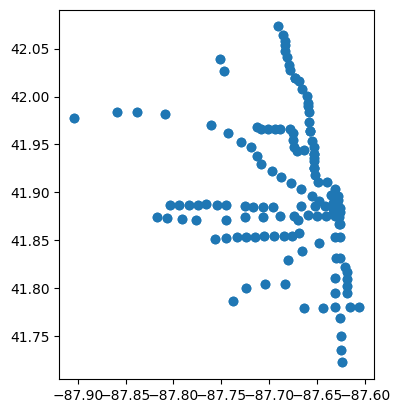

In [33]:
l_stops_geo.plot()

In [34]:
import geopandas as gpd 

stations_geo = gpd.GeoDataFrame(stations, geometry = gpd.points_from_xy(stations.Lng, stations.Lat))
stations_geo

,Lat,Lng,CurrentStationId,geometry
0,41.88074,-87.62770,81300,POINT (-87.62770 41.88074)
1,41.83896,-87.63085,85632,POINT (-87.63085 41.83896)
2,41.87815,-87.62760,85540,POINT (-87.62760 41.87815)
3,41.90392,-87.63141,81400,POINT (-87.63141 41.90392)
4,41.94743,-87.65363,81540,POINT (-87.65363 41.94743)
...,...,...,...,...
125884,41.96898,-87.75776,11595,POINT (-87.75776 41.96898)
131525,41.87369,-87.62679,55322,POINT (-87.62679 41.87369)
150913,41.80436,-87.70384,55477,POINT (-87.70384 41.80436)
281941,41.85418,-87.70225,61128,POINT (-87.70225 41.85418)


In [35]:
stations_geo

,Lat,Lng,CurrentStationId,geometry
0,41.88074,-87.62770,81300,POINT (-87.62770 41.88074)
1,41.83896,-87.63085,85632,POINT (-87.63085 41.83896)
2,41.87815,-87.62760,85540,POINT (-87.62760 41.87815)
3,41.90392,-87.63141,81400,POINT (-87.63141 41.90392)
4,41.94743,-87.65363,81540,POINT (-87.65363 41.94743)
...,...,...,...,...
125884,41.96898,-87.75776,11595,POINT (-87.75776 41.96898)
131525,41.87369,-87.62679,55322,POINT (-87.62679 41.87369)
150913,41.80436,-87.70384,55477,POINT (-87.70384 41.80436)
281941,41.85418,-87.70225,61128,POINT (-87.70225 41.85418)


### Null_Island encounter
In the train tracker data (edf) some of the CurrentStationId's are routing to Null Island which is at the Earth's surface at zerp degrees latitude and and zero degrees longitude (O N, O E)

<AxesSubplot: >

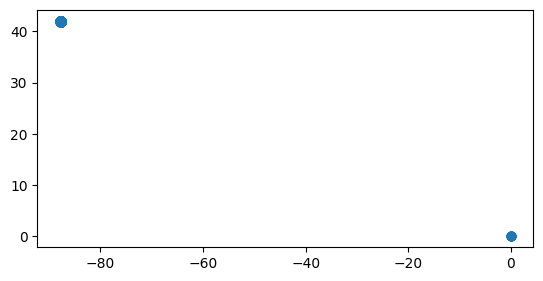

In [36]:
stations_geo.plot()

 ### l_stops & Stations Nearest Joins (sjoin_nearest)
Using sjoin_nearest we can configure the data set to connect CurrentStationId's to their closet parent_station along the line

In [37]:
import pandas as pd 
import geopandas as gpd 

l_stops = pd.read_parquet('l-stops.parquet').astype({'parent_station': 'int'})
stations = edf[['Lat', 'Lng', 'CurrentStationId']].drop_duplicates

In [38]:
stations_distances = gpd.sjoin_nearest(l_stops_geo, stations_geo, distance_col="distances")

In [39]:
stations_distances.head(500)

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,geometry,index_right,Lat,Lng,CurrentStationId,distances
10779,30001,NaN,Austin-Blue,None,41.870851,-87.776812,0,40010,0,POINT (-87.77681 41.87085),3941,41.87089,-87.77681,11080,0.000039
10780,30002,NaN,Austin-Blue,None,41.870851,-87.776812,0,40010,0,POINT (-87.77681 41.87085),3941,41.87089,-87.77681,11080,0.000039
10779,30001,NaN,Austin-Blue,None,41.870851,-87.776812,0,40010,0,POINT (-87.77681 41.87085),2943,41.87089,-87.77681,15640,0.000039
10780,30002,NaN,Austin-Blue,None,41.870851,-87.776812,0,40010,0,POINT (-87.77681 41.87085),2943,41.87089,-87.77681,15640,0.000039
10781,30003,NaN,Harlem-Green,None,41.886848,-87.803176,0,40020,1,POINT (-87.80318 41.88685),1190,41.88685,-87.80318,45020,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10918,30148,NaN,Granville,None,41.993664,-87.659202,0,40760,1,POINT (-87.65920 41.99366),8412,41.99366,-87.65920,81674,0.000004
10917,30147,NaN,Granville,None,41.993664,-87.659202,0,40760,1,POINT (-87.65920 41.99366),308,41.99366,-87.65920,85115,0.000004
10918,30148,NaN,Granville,None,41.993664,-87.659202,0,40760,1,POINT (-87.65920 41.99366),308,41.99366,-87.65920,85115,0.000004
10917,30147,NaN,Granville,None,41.993664,-87.659202,0,40760,1,POINT (-87.65920 41.99366),1840,41.99366,-87.65920,81667,0.000004


<AxesSubplot: >

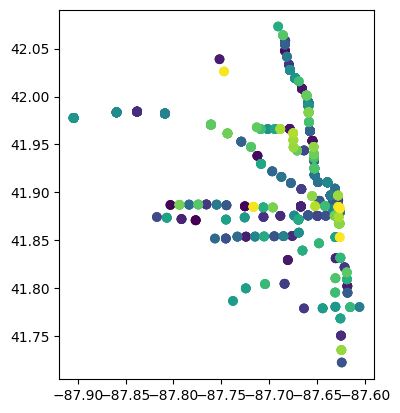

In [40]:
stations_distances.plot('parent_station')

<AxesSubplot: >

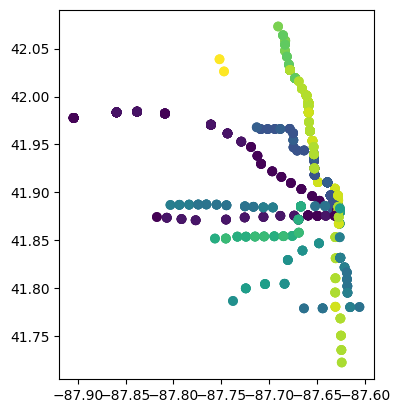

In [41]:
stations_distances.plot('CurrentStationId')

<AxesSubplot: >

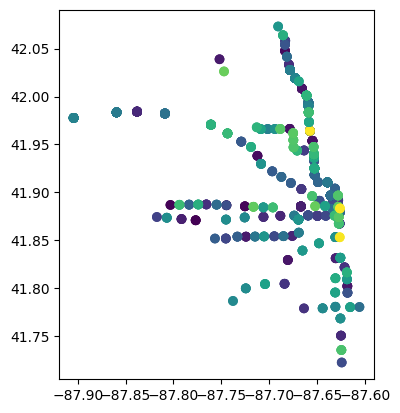

In [42]:
stations_distances.plot('stop_id')

The Mapping is color coded like a heatmap, since all parameters are graphed in a numerical value to their lat, lon

In [43]:
len(pdf.CurrentStationId.unique())

1925

### Parent Station Id's Sorted by Line and chronological order Mapping

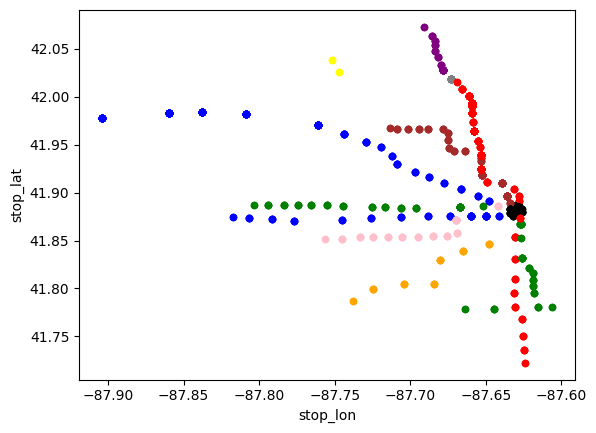

In [44]:
trainDict = {41290:'brown', 41180:'brown', 40870:'brown', 41010:'brown', 41480:'brown', 40090:'brown',
             41500:'brown', 41460:'brown', 41440:'brown', 41310:'brown', 40360:'brown', 41220:'brown',
             40660:'brown', 40800:'brown', 40710:'brown', 40460:'brown', 40530:'brown', 41210:'brown',
             41050:'purple', 41250:'purple', 40400:'purple', 40520:'purple', 40050:'purple', 40690:'purple', 
             40270:'purple', 40840:'purple', 40900:'gray', 
             40140:'yellow', 41680:'yellow', 
             41190:'red', 40100:'red', 41300:'red', 40760:'red', 40880:'red', 40340:'red', 41380:'red',
             41200:'red', 40770:'red', 40540:'red', 40080:'red', 41420:'red', 41320:'red', 41220:'red',
             40650:'red', 40630:'red', 41450:'red', 40330:'red',
             40450:'red', 41430:'red', 40240:'red', 40990:'red', 40910:'red', 41170:'red', 41230:'red',
             40190:'red', 41000:'red', 41400:'red', 41490:'red',
             40890:'blue', 40820:'blue', 40230:'blue', 40750:'blue', 41280:'blue', 41330:'blue', 40550:'blue', 41240:'blue',
             40060:'blue', 41020:'blue', 40570:'blue', 40670:'blue', 40590:'blue', 40320:'blue', 41410:'blue', 40490:'blue',
             40390:'blue', 40980:'blue', 40180:'blue', 40010:'blue', 40970:'blue', 40920:'blue', 40250:'blue', 40250:'blue',
             40220:'blue', 40810:'blue', 40470:'blue', 40350:'blue', 40430:'blue',
             40020:'green', 41350:'green', 40610:'green', 41260:'green', 40280:'green', 40700:'green', 40480:'green',
             40030:'green', 41670:'green', 41070:'green', 41360:'green', 40170:'green', 41160:'green', 
             40580:'pink', 41510:'pink', 40420:'pink', 40600:'pink', 40150:'pink', 40780:'pink', 41040:'pink', 40440:'pink', 40740:'pink',
             40210:'pink', 40830:'pink', 41030:'pink', 410170:'pink', 41160:'pink',
             40930:'orange', 40960:'orange', 41150:'orange', 40310:'orange', 40120:'orange', 41060:'orange', 41130:'orange',
             41400:'orange', 
             40290:'green', 40940:'green', 40510:'green', 40130:'green', 41080:'green', 41270:'green', 40300:'green',
             41120:'green', 41400:'green', 40720:'green', 41690:'green', 41140:'green', 41510:'green'}




import matplotlib.pyplot as plt

fig, ax = plt.subplots()
grouped = stations_distances.groupby('parent_station')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='stop_lon', y='stop_lat', color=trainDict.get(key, 'black'))

plt.show()

In [45]:
l_trips = pd.read_parquet('l-trips.parquet')

sort_order = [40140, 41680, 40900]

print("The original list is : " + str(l_trips))

print("The sort order list is : " + str(sort_order))

res = [i for j in sort_order
       for i in filter(lambda k: k[1] == j, l_trips)]
print("The list after appropriate sorting : " + str(res))

The original list is :       route_id service_id      trip_id  direction_id      block_id   shape_id  \
83858     Blue     106801  68227751047             1  6.802088e+10  306800132   
83859     Blue     106801  68227751048             0  6.802088e+10  306800002   
83860     Blue     106801  68227751049             0  6.802088e+10  306800002   
83861     Blue     106801  68227751050             1  6.802088e+10  306800001   
83862     Blue     106801  68227751054             0  6.802088e+10  306800002   
...        ...        ...          ...           ...           ...        ...   
89641        Y     106809  68227595655             0  6.802087e+10  306800033   
89642        Y     106809  68227595656             0  6.802087e+10  306800033   
89643        Y     106809  68227595657             0  6.802087e+10  306800033   
89644        Y     106809  68227595658             0  6.802087e+10  306800033   
89645        Y     106809  68227595662             0  6.802087e+10  306800033   

    

### stop_id's in chronoligcal order of various routes

In [46]:
'''import pandas as pd 

l_trips = pd.read_parquet('l-trips.parquet')
tuple([tuple(l_trips['stop_sequence']) for stop_sequence in l_trips])'''

"import pandas as pd \n\nl_trips = pd.read_parquet('l-trips.parquet')\ntuple([tuple(l_trips['stop_sequence']) for stop_sequence in l_trips])"

In [47]:
import pandas as pd 
'''
l_trips = pd.read_parquet('l-trips.parquet')
tuple([tuple(l_trips['station_sequence']) for station_sequence in l_trips])'''

"\nl_trips = pd.read_parquet('l-trips.parquet')\ntuple([tuple(l_trips['station_sequence']) for station_sequence in l_trips])"

### Null_Island Points

In [48]:
null_islands = stations_geo[stations_geo['Lat'] < 1]
print(null_islands)

       Lat  Lng  CurrentStationId                 geometry
1079   0.0  0.0             95040  POINT (0.00000 0.00000)
1308   0.0  0.0             95045  POINT (0.00000 0.00000)
1542   0.0  0.0             95048  POINT (0.00000 0.00000)
1620   0.0  0.0             95058  POINT (0.00000 0.00000)
1852   0.0  0.0             95060  POINT (0.00000 0.00000)
1927   0.0  0.0             95062  POINT (0.00000 0.00000)
2072   0.0  0.0             95064  POINT (0.00000 0.00000)
2144   0.0  0.0             95066  POINT (0.00000 0.00000)
2353   0.0  0.0             95035  POINT (0.00000 0.00000)
2426   0.0  0.0             95068  POINT (0.00000 0.00000)
2498   0.0  0.0             95070  POINT (0.00000 0.00000)
2569   0.0  0.0             95072  POINT (0.00000 0.00000)
2641   0.0  0.0             95078  POINT (0.00000 0.00000)
2786   0.0  0.0             95080  POINT (0.00000 0.00000)
2885   0.0  0.0             45418  POINT (0.00000 0.00000)
2888   0.0  0.0             41285  POINT (0.00000 0.0000

In [49]:
'''null_islands_df = pd.merge(null_islands, edf, on=['CurrentStationId'], how='inner')
print(null_islands_df.to_string())'''

"null_islands_df = pd.merge(null_islands, edf, on=['CurrentStationId'], how='inner')\nprint(null_islands_df.to_string())"

In [50]:
'''pdf.query('CurrentStationId == 95040')'''

"pdf.query('CurrentStationId == 95040')"

### l_stops_update
In this data the stop_id corresponds to the parent_station, and the route, line, and direction are defined. 

dir_code is sorted by 1 and 5. (North bound = 1, South Bound =5)

In [51]:
stations_distances.shape

(1060, 15)

In [52]:
import pandas as pd

l_stops_update = pd.read_parquet('l-stops-update.parquet')


In [53]:
l_stops_update.shape

(344, 12)

In [54]:
l_stops_update.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,route_id,line,dir_code
0,30001,NaN,Austin-Blue,None,41.870851,-87.776812,0,40010,0,Blue,B,1
403,30002,NaN,Austin-Blue,None,41.870851,-87.776812,0,40010,0,Blue,B,5
806,30003,NaN,Harlem-Green,None,41.886848,-87.803176,0,40020,1,G,G,5
1126,30004,NaN,Harlem-Green,None,41.886848,-87.803176,0,40020,1,G,G,1
1446,30005,NaN,Pulaski-Green,None,41.885412,-87.725404,0,40030,1,G,G,5


### 

In [55]:
import pandas as pd 

stations_map = pd.read_parquet("station-id-map.parquet")

In [56]:
stations_map.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,route_id,line,dir_code,geometry,index_right,Line,CurrentStationId,Lat,Lng,DirCode
0,30001,NaN,Austin-Blue,None,41.870851,-87.776812,0,40010,0,Blue,B,1,b'\x01\x01\x00\x00\x00\xfc\xc8\xadI\xb7\xf1U\x...,3941,B,11080,41.87089,-87.77681,1
1,30012,NaN,Belmont-Blue,None,41.938132,-87.712359,0,40060,0,Blue,B,1,b'\x01\x01\x00\x00\x00\xb9\x004J\x97\xedU\xc0a...,1245,B,11520,41.93813,-87.71236,1
2,30014,NaN,Jackson-Blue,None,41.878183,-87.629296,0,40070,1,Blue,B,1,b'\x01\x01\x00\x00\x00;\xe0\xbabF\xe8U\xc0\x9b...,2150,B,11300,41.87818,-87.62930,1
3,30034,NaN,Oak Park-Blue,None,41.872108,-87.791602,0,40180,0,Blue,B,1,b'\x01\x01\x00\x00\x00\xaf\\o\x9b\xa9\xf2U\xc0...,329,B,11060,41.87211,-87.79160,1
4,30042,NaN,Western-Forest Park,None,41.875478,-87.688436,0,40220,0,Blue,B,1,b'\x01\x01\x00\x00\x00\xe6X\xdeU\x0f\xecU\xc0\...,7177,B,11160,41.87553,-87.68844,1


In [57]:
edf.head()

,Line,Datetime,Lat,Lng,RunNumber,CurrentStationId,ExitStationId,Direction,LineName,DirMod,DestName,IsSched,CSSClass,Flags
0,R,2022-03-01 00:00:01,41.88074,-87.62770,819,81300,81780,1.591808,Red,to,Howard,False,ttpm_predslip_red,
1,R,2022-03-01 00:00:01,41.83896,-87.63085,822,85632,85788,4.736438,Red,to,95th/Dan Ryan,False,ttpm_predslip_red,
2,R,2022-03-01 00:00:01,41.87815,-87.62760,823,85540,85788,4.751092,Red,to,95th/Dan Ryan,False,ttpm_predslip_red,
3,R,2022-03-01 00:00:01,41.90392,-87.63141,828,81400,81780,3.152272,Red,to,Howard,False,ttpm_predslip_red,
4,R,2022-03-01 00:00:01,41.94743,-87.65363,832,81540,81780,1.583262,Red,to,Howard,False,ttpm_predslip_red,


In [58]:
Datetime = pd.DataFrame(edf)

Datetime.drop(['Flags', 'CSSClass', 'IsSched', 'DestName','DirMod','Direction', 'ExitStationId', 'Lat', 'Lng', 'Line', 'LineName' ], axis=1)

,Datetime,RunNumber,CurrentStationId
0,2022-03-01 00:00:01,819,81300
1,2022-03-01 00:00:01,822,85632
2,2022-03-01 00:00:01,823,85540
3,2022-03-01 00:00:01,828,81400
4,2022-03-01 00:00:01,832,81540
...,...,...,...
15242,2022-03-07 23:59:41,720,55240
15243,2022-03-07 23:59:41,721,55022
15244,2022-03-07 23:59:41,724,55500
15245,2022-03-07 23:59:41,725,55392


In [59]:
routes= stations_map.sort_values("CurrentStationId")

In [60]:
routes.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,route_id,line,dir_code,geometry,index_right,Line,CurrentStationId,Lat,Lng,DirCode
17,30076,NaN,Forest Park,None,41.874257,-87.817318,0,40390,1,Blue,B,1,b'\x01\x01\x00\x00\x00\xa8\x1b(\xf0N\xf4U\xc0H...,31,B,11020,41.87426,-87.81732,1
52,30189,NaN,Harlem-Forest Park,None,41.873490,-87.806961,0,40980,0,Blue,B,1,b'\x01\x01\x00\x00\x00p\t\xc0?\xa5\xf3U\xc0\x0...,476,B,11040,41.87349,-87.80696,1
3,30034,NaN,Oak Park-Blue,None,41.872108,-87.791602,0,40180,0,Blue,B,1,b'\x01\x01\x00\x00\x00\xaf\\o\x9b\xa9\xf2U\xc0...,329,B,11060,41.87211,-87.79160,1
0,30001,NaN,Austin-Blue,None,41.870851,-87.776812,0,40010,0,Blue,B,1,b'\x01\x01\x00\x00\x00\xfc\xc8\xadI\xb7\xf1U\x...,3941,B,11080,41.87089,-87.77681,1
51,30187,NaN,Cicero-Forest Park,None,41.871574,-87.745154,0,40970,0,Blue,B,1,b'\x01\x01\x00\x00\x00\xf3\x1eg\x9a\xb0\xefU\x...,5024,B,11100,41.87161,-87.74515,1


In [61]:
pdf.head()

,Line,Datetime,CurrentStationId,RunNumber,StopOrder,ParentStop,StopName,Prediction
0,R,2022-03-01 00:00:01,81300,819,0,41660,Lake,Due
1,R,2022-03-01 00:00:01,81300,819,1,40330,Grand,2
2,R,2022-03-01 00:00:01,81300,819,2,41450,Chicago,4
3,R,2022-03-01 00:00:01,81300,819,3,40630,Clark/Division,8
4,R,2022-03-01 00:00:01,81300,819,4,40650,North/Clybourn,10


In [62]:
line = pd.merge(routes, Datetime, on=["CurrentStationId"])

In [63]:
line.drop_duplicates("CurrentStationId").sort_values(["CurrentStationId", "Datetime", "stop_id", "DirCode"], ascending=(True, False, True, True))

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,route_id,...,Lng_y,RunNumber,ExitStationId,Direction,LineName,DirMod,DestName,IsSched,CSSClass,Flags
0,30076,NaN,Forest Park,None,41.874257,-87.817318,0,40390,1,Blue,...,-87.81732,130,11700,6.200427,Blu,to,O'Hare,False,ttpm_predslip_blue,
2614,30189,NaN,Harlem-Forest Park,None,41.873490,-87.806961,0,40980,0,Blue,...,-87.80696,130,11700,6.183922,Blu,to,O'Hare,False,ttpm_predslip_blue,
4021,30034,NaN,Oak Park-Blue,None,41.872108,-87.791602,0,40180,0,Blue,...,-87.79160,139,11700,6.195430,Blu,to,O'Hare,False,ttpm_predslip_blue,
5815,30001,NaN,Austin-Blue,None,41.870851,-87.776812,0,40010,0,Blue,...,-87.77681,135,11700,6.221108,Blu,to,O'Hare,False,ttpm_predslip_blue,
7355,30187,NaN,Cicero-Forest Park,None,41.871574,-87.745154,0,40970,0,Blue,...,-87.74515,135,11700,6.270655,Blu,to,O'Hare,False,ttpm_predslip_blue,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866146,30176,NaN,Howard,None,42.019063,-87.672892,0,40900,1,Y,...,0.00000,595,95090,0.000000,Yel,to,Howard,False,ttpm_predslip_yellow,
867286,30298,NaN,Oakton-Skokie,None,42.026243,-87.747221,0,41680,1,Y,...,0.00000,595,95090,0.000000,Yel,to,Howard,False,ttpm_predslip_yellow,
868915,30298,NaN,Oakton-Skokie,None,42.026243,-87.747221,0,41680,1,Y,...,0.00000,593,95090,0.000000,Yel,to,Howard,False,ttpm_predslip_yellow,
870844,30298,NaN,Oakton-Skokie,None,42.026243,-87.747221,0,41680,1,Y,...,0.00000,595,95090,0.000000,Yel,to,Howard,False,ttpm_predslip_yellow,


In [64]:
pdf1 = pdf.drop_duplicates("CurrentStationId")

In [65]:
run_predictions = pd.merge(line,pdf1, on="CurrentStationId" )

In [66]:
run_predictions = pd.merge(routes,pdf1, on="CurrentStationId" )

In [67]:
run_predictions.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,route_id,...,Lat,Lng,DirCode,Line_y,Datetime,RunNumber,StopOrder,ParentStop,StopName,Prediction
0,30076,NaN,Forest Park,None,41.874257,-87.817318,0,40390,1,Blue,...,41.87426,-87.81732,1,B,2022-03-01 00:00:01,130,0,40980,Harlem (Forest Park Branch),Due
1,30189,NaN,Harlem-Forest Park,None,41.873490,-87.806961,0,40980,0,Blue,...,41.87349,-87.80696,1,B,2022-03-01 00:02:01,130,0,40180,Oak Park,2
2,30034,NaN,Oak Park-Blue,None,41.872108,-87.791602,0,40180,0,Blue,...,41.87211,-87.79160,1,B,2022-03-01 00:01:22,139,0,40010,Austin,2
3,30001,NaN,Austin-Blue,None,41.870851,-87.776812,0,40010,0,Blue,...,41.87089,-87.77681,1,B,2022-03-01 00:17:42,135,0,40970,Cicero,5
4,30187,NaN,Cicero-Forest Park,None,41.871574,-87.745154,0,40970,0,Blue,...,41.87161,-87.74515,1,B,2022-03-01 00:22:41,135,0,40920,Pulaski,3


In [68]:
run_predictions.shape

(661, 26)

In [69]:
analysis = run_predictions.sort_values("RunNumber").sort_values(["Datetime", "CurrentStationId", "stop_id"], ignore_index=True)


In [70]:
pd.set_option('display.max_rows', 500)

analysis.head(50)

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,route_id,...,Lat,Lng,DirCode,Line_y,Datetime,RunNumber,StopOrder,ParentStop,StopName,Prediction
0,30076,NaN,Forest Park,None,41.874257,-87.817318,0,40390,1,Blue,...,41.87426,-87.81732,1,B,2022-03-01 00:00:01,130,0,40980,Harlem (Forest Park Branch),Due
1,30157,NaN,Illinois Medical District,None,41.875706,-87.673932,0,40810,1,Blue,...,41.87564,-87.67393,1,B,2022-03-01 00:00:01,220,0,40470,Racine,2
2,30111,NaN,California-O'Hare,None,41.921939,-87.696890,0,40570,0,Blue,...,41.92194,-87.69689,1,B,2022-03-01 00:00:01,228,0,41020,Logan Square,2
3,30159,NaN,Rosemont,None,41.983507,-87.859388,0,40820,1,Blue,...,41.98351,-87.85939,1,B,2022-03-01 00:00:01,131,0,40890,O'Hare,11
4,30045,NaN,Cumberland,None,41.984246,-87.838028,0,40230,1,Blue,...,41.98429,-87.83803,5,B,2022-03-01 00:00:01,218,0,40750,Harlem (O'Hare Branch),3
5,30035,NaN,Oak Park-Blue,None,41.872108,-87.791602,0,40180,0,Blue,...,41.87211,-87.79160,5,B,2022-03-01 00:00:01,288,0,40980,Harlem (Forest Park Branch),2
6,30137,NaN,Chicago-Brown,None,41.896810,-87.635924,0,40710,1,Brn,...,41.89678,-87.63595,1,T,2022-03-01 00:00:01,428,0,40710,Chicago,2
7,30137,NaN,Chicago-Brown,None,41.896810,-87.635924,0,40710,1,P,...,41.89678,-87.63595,1,T,2022-03-01 00:00:01,428,0,40710,Chicago,2
8,30137,NaN,Chicago-Brown,None,41.896810,-87.635924,0,40710,1,Brn,...,41.89678,-87.63595,1,P,2022-03-01 00:00:01,519,0,40800,Sedgwick,3
9,30137,NaN,Chicago-Brown,None,41.896810,-87.635924,0,40710,1,P,...,41.89678,-87.63595,1,P,2022-03-01 00:00:01,519,0,40800,Sedgwick,3


In [71]:
newdataframe = pd.merge(routes,Datetime, on="CurrentStationId" )

In [72]:
newdataframe.shape

(876976, 32)

In [73]:
import pandas as pd 

pd.set_option('display.max_rows', 500)
newdataframe.drop_duplicates("CurrentStationId")
newdataframe = newdataframe.sort_values(["CurrentStationId"], ascending=True)
newdataframe.head(500)

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,route_id,...,Lng_y,RunNumber,ExitStationId,Direction,LineName,DirMod,DestName,IsSched,CSSClass,Flags
0,30076,NaN,Forest Park,None,41.874257,-87.817318,0,40390,1,Blue,...,-87.81732,130,11700,6.200427,Blu,to,O'Hare,False,ttpm_predslip_blue,
1739,30076,NaN,Forest Park,None,41.874257,-87.817318,0,40390,1,Blue,...,-87.81732,224,11700,6.200427,Blu,to,O'Hare,False,ttpm_predslip_blue,
1740,30076,NaN,Forest Park,None,41.874257,-87.817318,0,40390,1,Blue,...,-87.81732,224,11700,6.200427,Blu,to,O'Hare,False,ttpm_predslip_blue,
1741,30076,NaN,Forest Park,None,41.874257,-87.817318,0,40390,1,Blue,...,-87.81732,224,11700,6.200427,Blu,to,O'Hare,False,ttpm_predslip_blue,
1742,30076,NaN,Forest Park,None,41.874257,-87.817318,0,40390,1,Blue,...,-87.81732,224,11700,6.200427,Blu,to,O'Hare,False,ttpm_predslip_blue,
1743,30076,NaN,Forest Park,None,41.874257,-87.817318,0,40390,1,Blue,...,-87.81732,224,11700,6.200427,Blu,to,O'Hare,False,ttpm_predslip_blue,
1744,30076,NaN,Forest Park,None,41.874257,-87.817318,0,40390,1,Blue,...,-87.81732,224,11700,6.200427,Blu,to,O'Hare,False,ttpm_predslip_blue,
1745,30076,NaN,Forest Park,None,41.874257,-87.817318,0,40390,1,Blue,...,-87.81732,224,11700,6.200427,Blu,to,O'Hare,False,ttpm_predslip_blue,
1738,30076,NaN,Forest Park,None,41.874257,-87.817318,0,40390,1,Blue,...,-87.81732,224,11700,6.200427,Blu,to,O'Hare,False,ttpm_predslip_blue,
1746,30076,NaN,Forest Park,None,41.874257,-87.817318,0,40390,1,Blue,...,-87.81732,224,11700,6.200427,Blu,to,O'Hare,False,ttpm_predslip_blue,


In [74]:
stations_map = stations_map.rename(columns={'stop_name' : 'StopName', 'parent_station' : 'ParentStop'})

### Predictions data compared to the actual route

In [75]:
import pandas as pd

pdf = pd.read_parquet('2022-03-preds-start.parquet')

In [76]:
pdf.head()

,Line,Datetime,CurrentStationId,RunNumber,StopOrder,ParentStop,StopName,Prediction
0,R,2022-03-01 00:00:01,81300,819,0,41660,Lake,Due
1,R,2022-03-01 00:00:01,81300,819,1,40330,Grand,2
2,R,2022-03-01 00:00:01,81300,819,2,41450,Chicago,4
3,R,2022-03-01 00:00:01,81300,819,3,40630,Clark/Division,8
4,R,2022-03-01 00:00:01,81300,819,4,40650,North/Clybourn,10


In [77]:
pdf.sort_values("CurrentStationId")

,Line,Datetime,CurrentStationId,RunNumber,StopOrder,ParentStop,StopName,Prediction
230445,B,2022-03-05 21:16:21,11020,112,2,40010,Austin,6
131165,B,2022-03-01 02:27:21,11020,132,6,40220,Western (Forest Park Branch),19
585783,B,2022-03-06 13:32:41,11020,203,6,40220,Western (Forest Park Branch),19
885201,B,2022-03-04 02:14:21,11020,229,4,40920,Pulaski,Delayed
885200,B,2022-03-04 02:14:21,11020,229,3,40970,Cicero,Delayed
...,...,...,...,...,...,...,...,...
998374,Y,2022-03-07 02:24:41,95080,594,0,40900,Howard,Delayed
1590873,Y,2022-03-04 19:58:41,95080,595,0,40900,Howard,Due
1729997,Y,2022-03-07 21:22:21,95080,593,0,40900,Howard,Due
1203532,Y,2022-03-07 11:44:21,95080,591,0,40900,Howard,Delayed


In [78]:
pdf.sort_values(['Datetime', 'ParentStop', 'RunNumber'])

,Line,Datetime,CurrentStationId,RunNumber,StopOrder,ParentStop,StopName,Prediction
218,B,2022-03-01 00:00:01,11020,130,2,40010,Austin,5
232,B,2022-03-01 00:00:01,15586,140,2,40010,Austin,12
371,G,2022-03-01 00:00:01,41681,17,4,40020,Harlem/Lake,6
382,G,2022-03-01 00:00:01,41520,18,10,40020,Harlem/Lake,19
413,G,2022-03-01 00:00:01,41620,616,7,40020,Harlem/Lake,13
...,...,...,...,...,...,...,...,...
65743,T,2022-03-07 23:59:41,31181,428,0,41700,Washington/Wabash,Due
65560,P,2022-03-07 23:59:41,35338,523,7,41700,Washington/Wabash,17
65673,G,2022-03-07 23:59:41,45181,613,7,41700,Washington/Wabash,15
65702,G,2022-03-07 23:59:41,51212,621,1,41700,Washington/Wabash,2


### Filtered data in chronological order of a run